Ex: 5.15-5.18,5.22-5.23, 5.27-5.31

# 5.15 Cholesky. Simulate normal asset return NYSE coeff data


In [2]:
x <- matrix(unlist(read.table("http://www.uio.no/studier/emner/matnat/math/STK3505/h16/data/newyork.daily.txt",row.names=NULL,header=TRUE)),ncol=4)

In [66]:
R = exp(x) - 1 # 4 stocks
cat('\ndim(R)\n', dim(R))

covR = cov(R)
cat('\ncovR\n', covR, '\n')

C = t(chol(covR))
print(C)
print('dim(C)')
print(dim(C)) # 4,4

Rbar = apply(R,2,mean) # mean of the four different stocks
xi = Rbar
print('xi')
print(xi)

sdEmpirical = apply(R, 2, sd)
cat('\n sd Empirical', sdEmpirical)

m = 100000

eta = matrix(rnorm(4*m), 4, m) # m valies for each of the 4 stocks
print('dim(eta)')
print(dim(eta))

eps = C%*%eta # (5.16) p. 147. %*% equals matrix multiplication

Rsim = xi + eps
print('dim(Rsim)')
print(dim(Rsim)) # 1 row = 1 stock

Mean = apply(Rsim, 1, mean) # Row average, since one stock represents 1 row in Rsim
Vol = apply(Rsim, 1, sd)
Cor = cor(t(Rsim))

print('')
#print(c('mean/xi', Mean/xi, 'Vol/sdEmpirical', VolsdEmpirical, 'Cor', Cor))
cat('\nmean/xi', Mean/xi, '\nVol/sdEmprical', Vol/sdEmpirical, '\nCor\n', Cor)

cat('\nMaybe COrr from empirical\n')
solve(diag(sqrt(diag(var(R)))))%*%var(R)%*%solve(diag(sqrt(diag(var(R)))))
cat('\nCor\n')
Cor




dim(R)
 4689 4
covR
 9.150302e-05 8.479611e-05 6.38206e-05 8.416001e-05 8.479611e-05 0.0001405015 6.015403e-05 8.812117e-05 6.38206e-05 6.015403e-05 8.190845e-05 6.412773e-05 8.416001e-05 8.812117e-05 6.412773e-05 0.0001543541 
            [,1]         [,2]         [,3]       [,4]
[1,] 0.009565721 0.0000000000 0.0000000000 0.00000000
[2,] 0.008864581 0.0078689682 0.0000000000 0.00000000
[3,] 0.006671803 0.0001285175 0.0061138352 0.00000000
[4,] 0.008798084 0.0012873156 0.0008608694 0.00863421
[1] "dim(C)"
[1] 4 4
[1] "xi"
[1] 0.0004926828 0.0004576292 0.0003485732 0.0004980227

 sd Empirical 0.009565721 0.01185333 0.009050329 0.01242393[1] "dim(eta)"
[1]      4 100000
[1] "dim(Rsim)"
[1]      4 100000
[1] ""

mean/xi 1.003829 0.8887201 1.007696 1.015179 
Vol/sdEmprical 1.003443 1.002863 1.003493 1.006756 
Cor
 1 0.7503236 0.7390886 0.7119159 0.7503236 1 0.5655886 0.6024303 0.7390886 0.5655886 1 0.5760354 0.7119159 0.6024303 0.5760354 1
Maybe COrr from empirical


1.0000000,0.7478557,0.737189,0.708156
0.7478557,1.0000000,0.560738,0.598385
0.7371890,0.5607380,1.000000,0.570325
0.7081560,0.5983850,0.570325,1.000000



Cor


1.0000000,0.7503236,0.7390886,0.7119159
0.7503236,1.0000000,0.5655886,0.6024303
0.7390886,0.5655886,1.0000000,0.5760354
0.7119159,0.6024303,0.5760354,1.0000000


Mean and std very similar to empircal data. <br>

<mark> Is the equation for Cor empirical the matrix equation I have used in the end?
    
    
# 5.16. Portfolio NYSE case ex 5.15

In [12]:
R = exp(x) - 1 # x loaded in 5.15
covR = cov(R)
C = t(chol(covR))
xi = apply(R,2,mean)
sdEmpirical = apply(R, 2, sd)

m = 100000

eta = matrix(rnorm(4*m), 4, m)

eps = C%*%eta # (5.16) p. 147. %*% equals matrix multiplication

Rsim = xi + eps

Mean = apply(Rsim, 1, mean) # Row average, since one stock represents 1 row in Rsim
Vol = apply(Rsim, 1, sd)
Cor = cor(t(Rsim))

w = rep(0.25,4)
#RPortfolio = apply(w*Rsim, 2, sum) # Unclear
RPortfolio = w %*%Rsim # Alternative to book. More understandable.
cat('\n dim(RPortfolio) \n', dim(RPortfolio))
#RPortfolio
VolPortfolio = sd(RPortfolio)
cat('\nsdPortfolio\n', VolPortfolio)

cat('\nsd_empircal\n)', sdEmpirical)


 dim(RPortfolio) 
 1 100000
sdPortfolio
 0.009240438
sd_empircal
) 0.009565721 0.01185333 0.009050329 0.01242393

Portfolio has almost as low volatility as the stock with lowest volatility.

# 5.18 Mean vector and covariance matrix <mark>NOT CURRICILUM THIS YEAR

In [30]:
ERi = .11
sdRi = .25
corr1 = .8
corr23 = .4

Rbar = ERi
D = diag(1/(1+Rbar))
D

sigma_ii = sqrt(log(1 + sdRi^2/(1+ERi)^2)) # Formula ex 5.17 p. 174 with i=j
sigma_ii 
xi_i = log(1 +ERi) - sigma_ii^2/2
xi_i

sig1 = log(1 + corr1*sdRi^2/(1+ERi)^2)

sig23 = log(1 + corr23*sdRi^2/(1+ERi)^2)

# Assuming sig1 and sig23 equals cov1 and cov23

corr1 = sig1/sigma_ii^2
corr1
corr23 = sig23/sigma_ii^2
corr23


<0 x 0 matrix>

[1] 0.2224449

[1] 0.07961915

[1] 0.8039194

[1] 0.4059569

<mark> Unsure correlation calculations.

# 5.22  Random walk. Percentiles
I solved these, but the solutions didn't save to disk. Will not repeat this. See ex sol's. Unsure of some things, noted in excel file.

#  5.23 Random walk MC
I solved these, but the solutions didn't save to disk. Will not repeat this. See ex sol's. Unsure of some things, noted in excel file.

# 5.27 RW. Two correlated assets

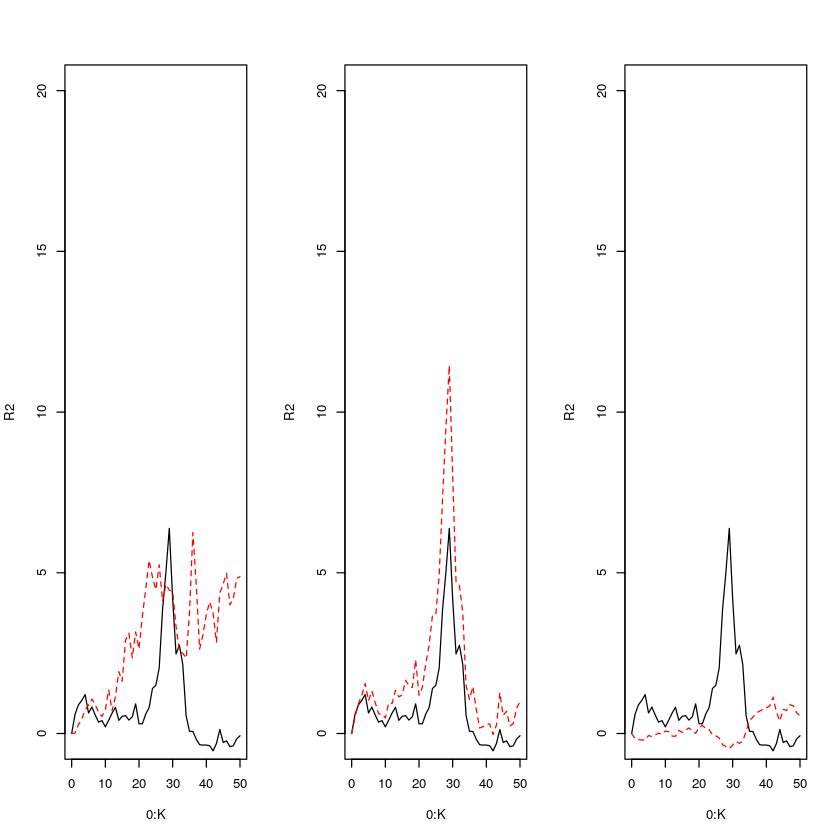

In [67]:
K = 50
xi = .05
sigma = .25
rhos = c(0, .9, -.9)
eps = matrix(rnorm(2*K), K, 2)

par(mfrow = c(1, length(rhos)))
yLim=c(0,20)

for (rho in rhos){
    eps[,2] = rho*eps[,1] + sqrt(1 - rho^2)*eps[,2] # Recalculates the 2nd col to take into account dependence
    R = exp(xi + sigma*apply(eps, 2, cumsum)) - 1
    R2 = rbind(c(0,0), R) # Adds new column with zeros
    matplot(0:K,R2,type="l",ylim=yLim)
    
}

Left zero corr, middle high pos corr, right high neg corr.

# 5.28 Autocorrelation function. Nibor. AR1.

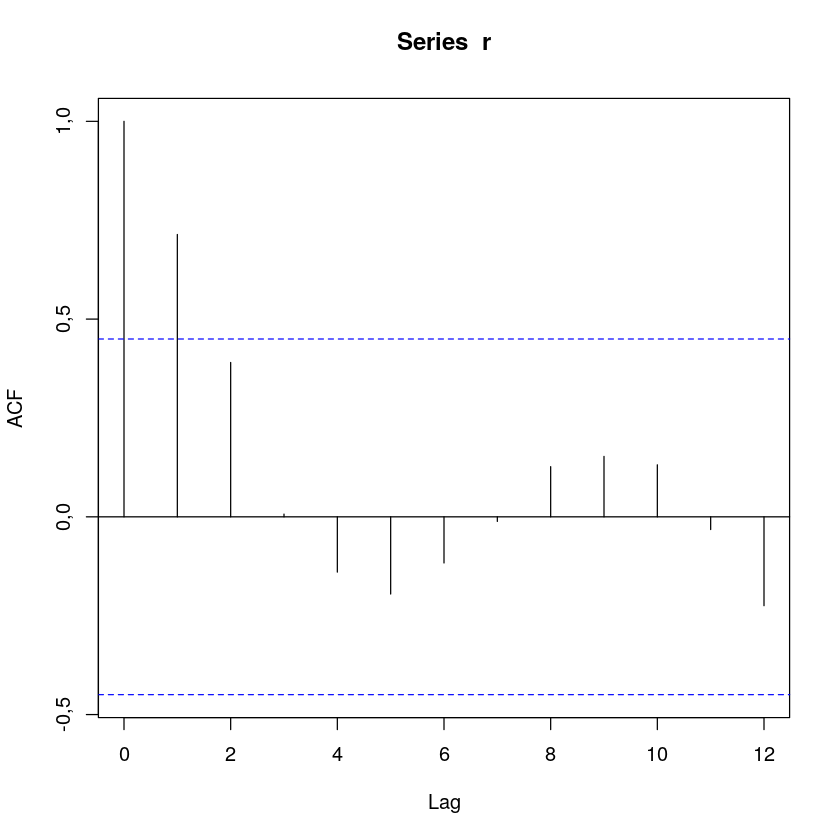

In [73]:
r = scan("https://www.uio.no/studier/emner/matnat/math/STK3505/h17/datasett/nibornor.txt")
acf(r)

According to (this)[https://stats.stackexchange.com/questions/49571/understanding-the-blue-dotted-lines-in-an-acf-from-r] link, the arease between the vertical lines represents the values for which the coefficient is not significantly different from zero. Hence lag zero and lag one are the only lags with coefficients significantly different from zero. We have an AR1-process.

# 5.29 Proof & Vasicek. Sample statistics. NIBOR
## Argue $\hat{\xi} = \bar{r},\; \hat{a} = \hat{\rho}_1$ and $\hat{\sigma} = s \sqrt{1- \hat{a}^2}$ are possible estimates.
$\xi$ is the mean value, and it is natural to use the mean of $r$. $a$ is the coefficient for the AR1-term, so it is natural to apply the corresponding estimate from the data seris. 

<mark> Error in exercise text? Shouldn't it be $\hat{\sigma} = s/ \sqrt{1- \hat{a}^2}$
    
If so, then the expression for $\hat{sigma}$ equals the long term value of $\sigma$ from p. 158.

0,06206316 0,713879 0,01810603

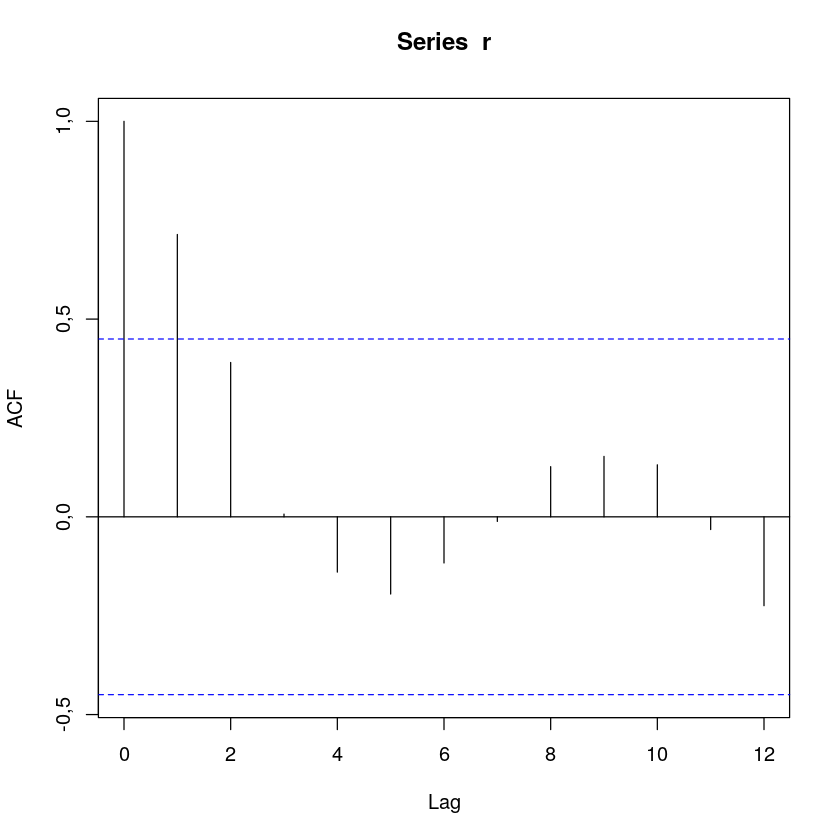

In [78]:
xiHat = mean(r)
aHat = acf(r)[[1]][2]
sigmaHat = sd(r) * sqrt(1-aHat**2)
cat(xiHat, aHat, sigmaHat)

# 5.30 Vasicek. Gaussian

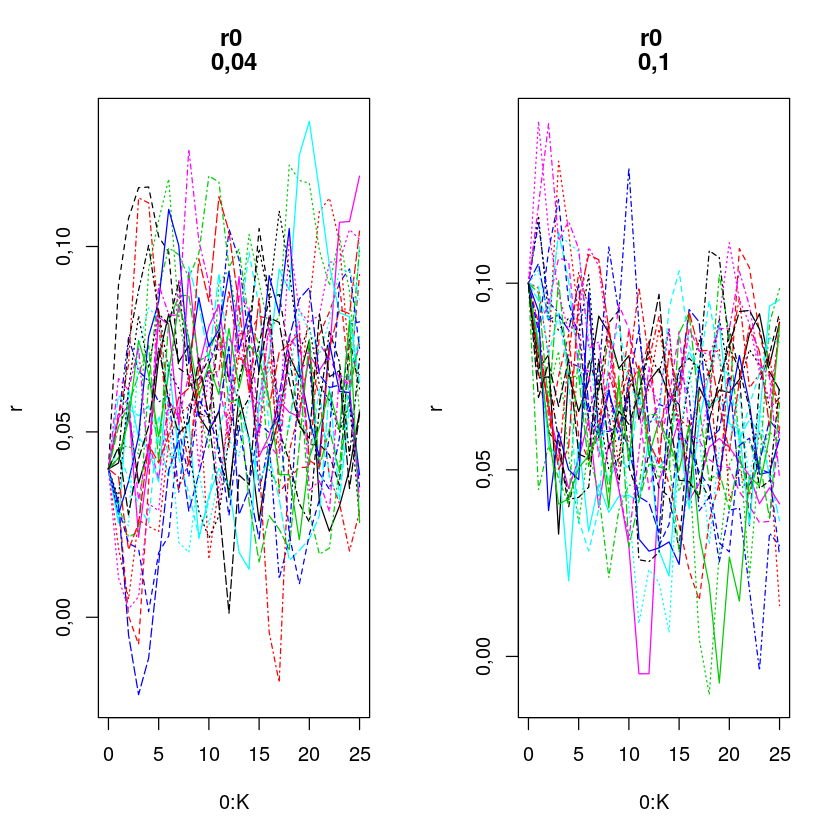

In [110]:
xi = .062
sigma = .018
a = .71
r0s = c(.04, .1)
K = 25
m = 25

par(mfrow = c(1, length(r0s)))
for (r0 in r0s){
    x0 = r0-xi
    X = matrix(x0, K+1, m) # Matrix with all elements equal to x0

    for (k in 1:K+1){
        X[k,] = a*X[k-1,] + sigma*rnorm(m) # All MC in one go. One MC per column
    }
    r = xi + X

    matplot(0:K, r, "l")
    title(c('r0 ', r0))
}



Not big difference in long run. Corresponds with description in p. 159, where the effect of the initial value seems to fade with time.

# 5.31 Vasicek. Density function estimate

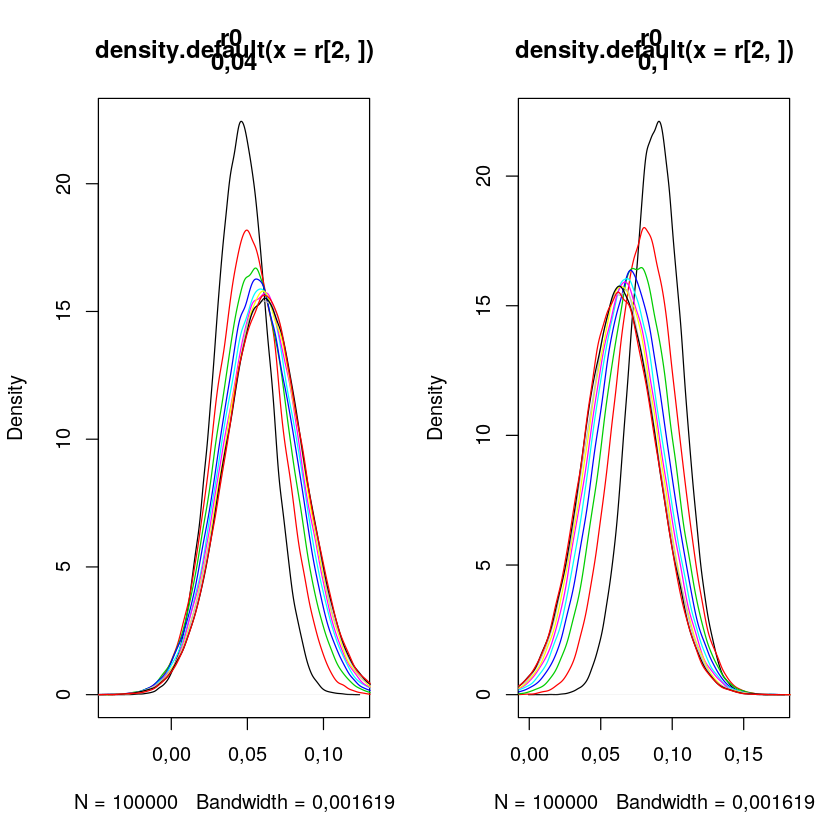

In [114]:
xi = .062
sigma = .018
a = .71
r0s = c(.04, .1)
K = 10
m = 100000

par(mfrow = c(1, length(r0s)))
for (r0 in r0s){
    x0 = r0-xi
    X = matrix(x0, K+1, m) # Matrix with all elements equal to x0

    for (k in 1:K+1){
        X[k,] = a*X[k-1,] + sigma*rnorm(m) # All MC in one go. One MC per column
    }
    r = xi + X

    plot(density(r[2,])) # For each period the PDF of the MC simulation values is calculated.
    for(k in 1+2:K)
     {
       lines(density(r[k,]),col=k-1)
     }
    title(c('r0 ', r0))
}


The start out around their starting point. Then the distributions converge. This shows the same picture as the previous exercise: When time increases the effect of the initial value fades out.

# 5.22 Previous years sol

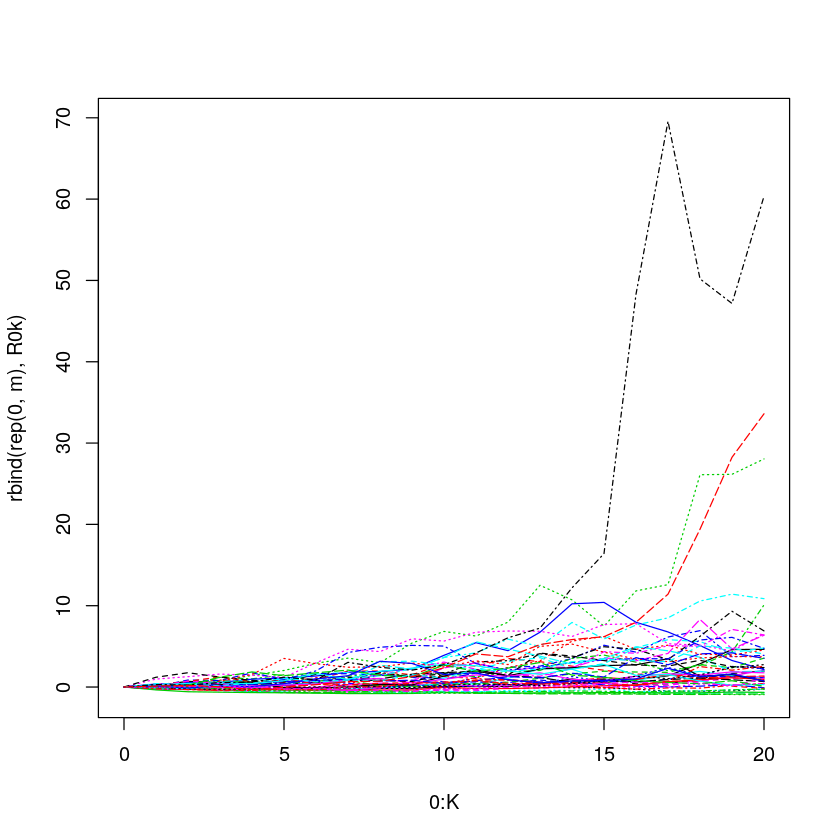

In [2]:
xi <- 0.05
sigma <- 0.25
K <- 20
m <- 50

eta <- matrix(rnorm(m*K),ncol=m)
R0k <- exp(apply(xi+sigma*eta,2,cumsum))-1

matplot(0:K,rbind(rep(0,m),R0k),type="l")